In [1]:
# Importing all necessary libraries
import cv2
import os
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline



In [33]:
three_stack_range = (6.5, 15.65)
five_stack_range = (18, 34)
ball_roll_range = (57, 84.1)
bookshelf_range = (85, 100.2)
bucket_range = (104, 127.2)

length = 6

frames = lambda rng: [int(30*(rng[0]+((rng[1]-rng[0])*i)/float(length))) for i in range(length)]

# print(frames(three_stack_range))
# print(frames(five_stack_range))
# print(frames(ball_roll_range))
# print(frames(bookshelf_range))
# print(frames(bucket_range))

all_frames = [
# [195, 240, 286, 332, 378, 453],
[540, 640, 700, 859, 980],
[1850, 1990, 2200, 2400, 2450],
[2550, 2702, 2860, 2930, 2990],
[3110, 3236, 3727, 3735, 3750]
]

labels = [
    ["1-Stack (Start)", "2-Stack", "3-Stack", "4-Stack", "5-Stack (Goal)"],
    ["1-Stack (Start)", "2-Stack", "Place Ramp", "Drop Block", "Block Slides (Goal)"],
    ["Separated (Start)", "Place Together", "Link Together", "Pickup Tool", "Reach Book (Goal)"],
    ["Scattered (Start)", "Place In Bucket", "Untie Rope", "Bucket Falls", "Block Flies (Goal)"]
]



Figure(1728x1296)
0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
Saving frames pdf


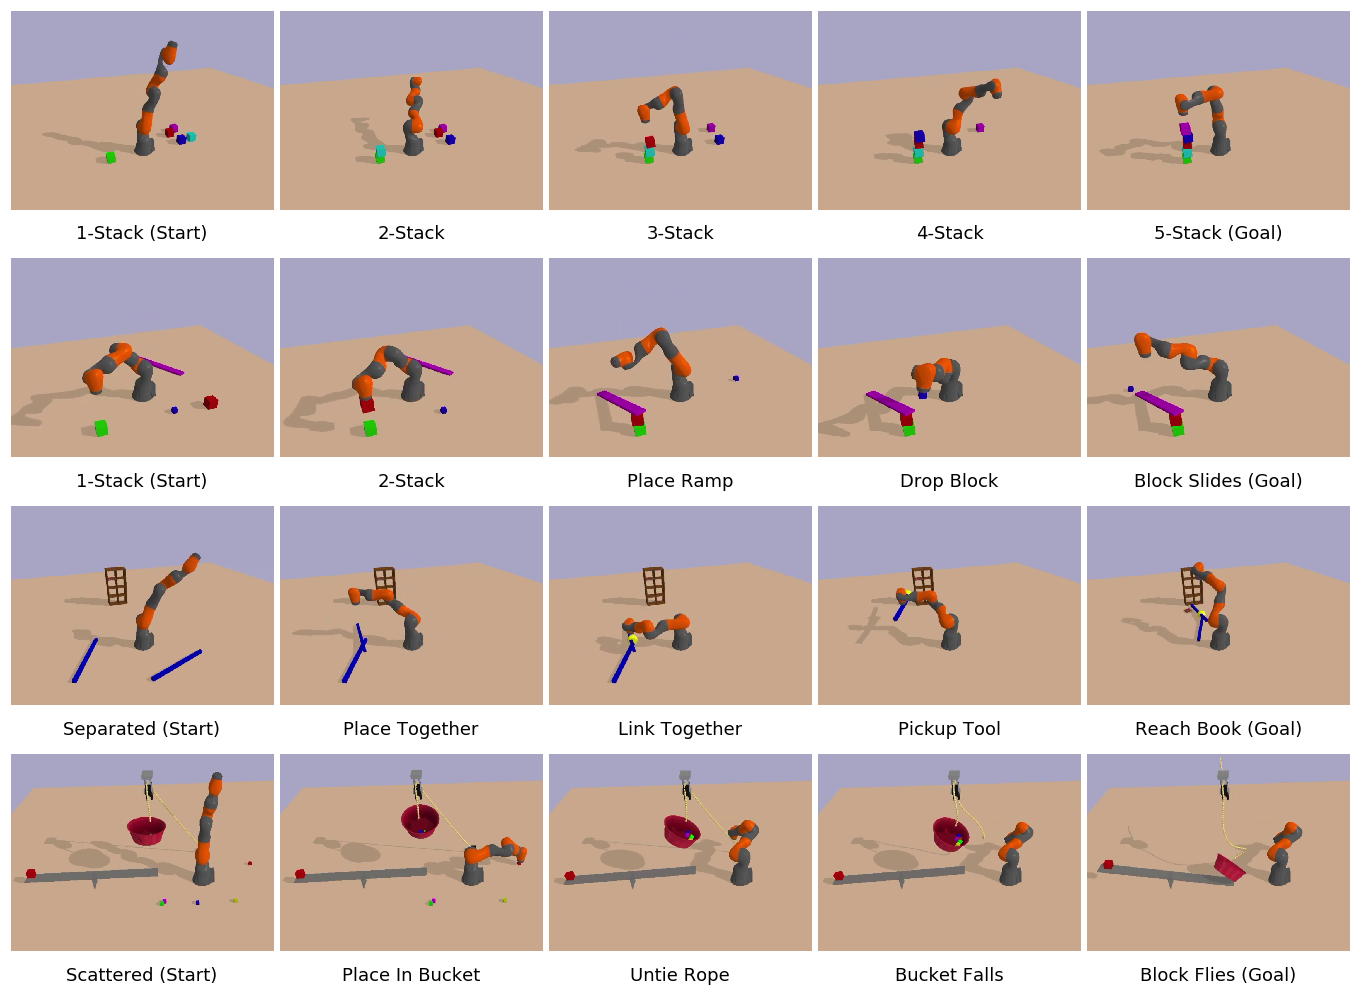

In [47]:
# Read the video from specified path
cam = cv2.VideoCapture("./CSP.mp4")

try:
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')

    # if not created then raise error
except OSError:
    print('Error: Creating directory of data')

# frame
currentframe = 0

fig = plt.figure(figsize = (24, 18))
print(fig)
gs1 = gridspec.GridSpec(len(all_frames), len(all_frames[0]))
gs1.update(wspace=0.025, hspace=0.05)

print(gs1[0])

for time in range(0, 4000):
    # reading from frame
    ret, frame = cam.read()
    gs_index = 0
    for i, sub_frames in enumerate(all_frames):
        for j, aframe in enumerate(sub_frames):
            if(aframe == time):
                print(i, j)
                # writing the extracted images
        #         cv2.imwrite(name, frame)
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                ax = plt.subplot(gs1[gs_index])
                plt.axis('off')
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.set_xticks([])
                ax.set_yticks([])
                if(i!=3):
                    ax.imshow(frame[0:515, 300:980, :])
                else:
                    ax.imshow(frame[0:900, 140:1100, :])
                ax.text(0.5,-0.15, labels[i][j], size=18, ha="center", transform=ax.transAxes)


            gs_index+=1
    
cam.release()
cv2.destroyAllWindows()
print("Saving frames pdf")
pp = PdfPages('test_frame.pdf')
fig = plt.gcf()
pp.savefig(fig)